In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### 1.	Data Cleaning and Preparation:
#### ●	Load the dataset into a DataFrame or equivalent data structure.
#### ●	Handle missing values appropriately (e.g., imputation, deletion).
#### ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
#### ●	Detect and treat outliers if necessary.


#### 1.Read the data

In [58]:
data = pd.read_csv('Cardiotocographic.csv')

In [59]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [60]:
data.shape

(2126, 14)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [62]:
data1 = data.copy()

In [63]:
data1.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

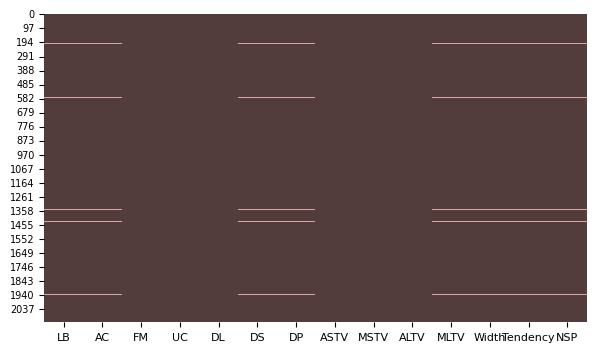

In [64]:
plt.figure(figsize=(7,4))
color=['#523d3c','#d6a9a7']
sns.heatmap(data1.isna(),cbar=False,cmap=color)
plt.xticks(fontsize=8,rotation=0)
plt.yticks(fontsize=7)
plt.show()

In [65]:
lb_median=np.round(data1['LB'].median())
ac_median=np.round(data1['AC'].median())
ds_median=np.round(data1['DS'].mean())
dp_median=np.round(data1['DP'].median())
mltv_median=np.round(data1['MLTV'].median())
width_median=np.round(data1['Width'].median())
tendency_median=np.round(data1['Tendency'].median())
nsp_mode=data1['NSP'].mode()[0]
lb_median,ac_median,ds_median,dp_median,mltv_median,width_median,tendency_median,nsp_mode

(np.float64(133.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(7.0),
 np.float64(67.0),
 np.float64(0.0),
 np.float64(1.0))

In [66]:
data1.fillna(
    {'LB':lb_median,
     'AC':ac_median,
     'DS':ds_median,
     'DP':dp_median,
     'MLTV':mltv_median,
     'Width':width_median,
     'Tendency':tendency_median,
     'NSP':nsp_mode
    },
    inplace=True
)

In [67]:
data1.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [68]:
data1['NSP'] = data1['NSP'].astype(int)

In [69]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 232.7 KB


In [70]:
z_scores = np.abs(stats.zscore(data1.drop(columns="NSP")))
outliers = (z_scores > 3).any(axis=1)   
data1_no_outliers = data1[outliers]   
data1_no_outliers = data1_no_outliers[data1_no_outliers["NSP"].isin([1, 2, 3])]


In [71]:
data1_no_outliers.shape

(242, 14)

In [72]:
data1.shape

(2126, 14)

In [73]:
data1_no_outliers["NSP"].value_counts()

NSP
1    141
3     81
2     20
Name: count, dtype: int64

#### 2.	Statistical Summary:
#### ●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
#### ●	Highlight any interesting findings from this summary.


In [74]:
#data1.hist(figsize=(15, 12), bins=30, edgecolor="black")
#plt.suptitle("Histograms of All Features", fontsize=16)
#plt.show()

In [75]:
#plt.figure(figsize=(15, 8))
#sns.boxplot(data=data1.drop(columns=["NSP"])) 
#plt.title("Boxplots of Features (Outlier Detection)")
#plt.xticks(rotation=45)
#plt.show()

In [76]:
#plt.figure(figsize=(6,4))
#sns.countplot(x="NSP", data=data1_no_outliers, palette="Set2")
#plt.title("Class Distribution of NSP")
#plt.xlabel("NSP (Target Variable)")
#plt.ylabel("Count")
#plt.show()

In [77]:
summary_stats = pd.DataFrame({
    "Mean": data1.mean(),
    "Median": data1.median(),
    "Std Dev": data1.std(),
    "IQR": data1.quantile(0.75) - data1.quantile(0.25)
}).round(3)
summary_stats

,Mean,Median,Std Dev,IQR
LB,133.340,133.000,11.214,14.000
AC,0.003,0.002,0.004,0.006
FM,0.010,0.000,0.068,0.003
UC,0.004,0.004,0.003,0.005
DL,0.002,0.000,0.003,0.003
DS,0.000,0.000,0.000,0.000
DP,0.000,0.000,0.001,0.000
ASTV,46.996,49.000,18.814,29.000
MSTV,1.364,1.200,1.174,1.000
ALTV,10.286,0.000,21.205,11.000


In [83]:
def summarize_variable(col):
    mean = data1[col].mean()
    median = data1[col].median()
    std = data1[col].std()
    iqr = data1[col].quantile(0.75) - data1[col].quantile(0.25)
    print(f'\n{col}:')
    print(f'Mean = {mean:.3f},Median = {median:.3f}')
    print(f'Std Dev = {std:.3f}, IQR = {iqr:.3f}')

    #distribution shape

    if abs(mean - median)<0.1*std:
        print('Symmetrical Distribution')
    elif mean > median:
        print('Right-Skewed Distribution')
    else:
        print('Left-Skewed Distribution')

    #Variation 

    if std == 0 or iqr == 0:
        print('very low variation,most values are identical')
    elif std>mean:
        print('very high variation,outliers present')
for col in data1.columns:
    summarize_variable(col)


LB:
Mean = 133.340,Median = 133.000
Std Dev = 11.214, IQR = 14.000
Symmetrical Distribution

AC:
Mean = 0.003,Median = 0.002
Std Dev = 0.004, IQR = 0.006
Right-Skewed Distribution
very high variation,outliers present

FM:
Mean = 0.010,Median = 0.000
Std Dev = 0.068, IQR = 0.003
Right-Skewed Distribution
very high variation,outliers present

UC:
Mean = 0.004,Median = 0.004
Std Dev = 0.003, IQR = 0.005
Symmetrical Distribution

DL:
Mean = 0.002,Median = 0.000
Std Dev = 0.003, IQR = 0.003
Right-Skewed Distribution
very high variation,outliers present

DS:
Mean = 0.000,Median = 0.000
Std Dev = 0.000, IQR = 0.000
Symmetrical Distribution
very low variation,most values are identical

DP:
Mean = 0.000,Median = 0.000
Std Dev = 0.001, IQR = 0.000
Right-Skewed Distribution
very low variation,most values are identical

ASTV:
Mean = 46.996,Median = 49.000
Std Dev = 18.814, IQR = 29.000
Left-Skewed Distribution

MSTV:
Mean = 1.364,Median = 1.200
Std Dev = 1.174, IQR = 1.000
Right-Skewed Distributi

#### 3.	Data Visualization:
##### ●	Create histograms or boxplots to visualize the distributions of various numerical variables.
##### ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
##### ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
##### ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights


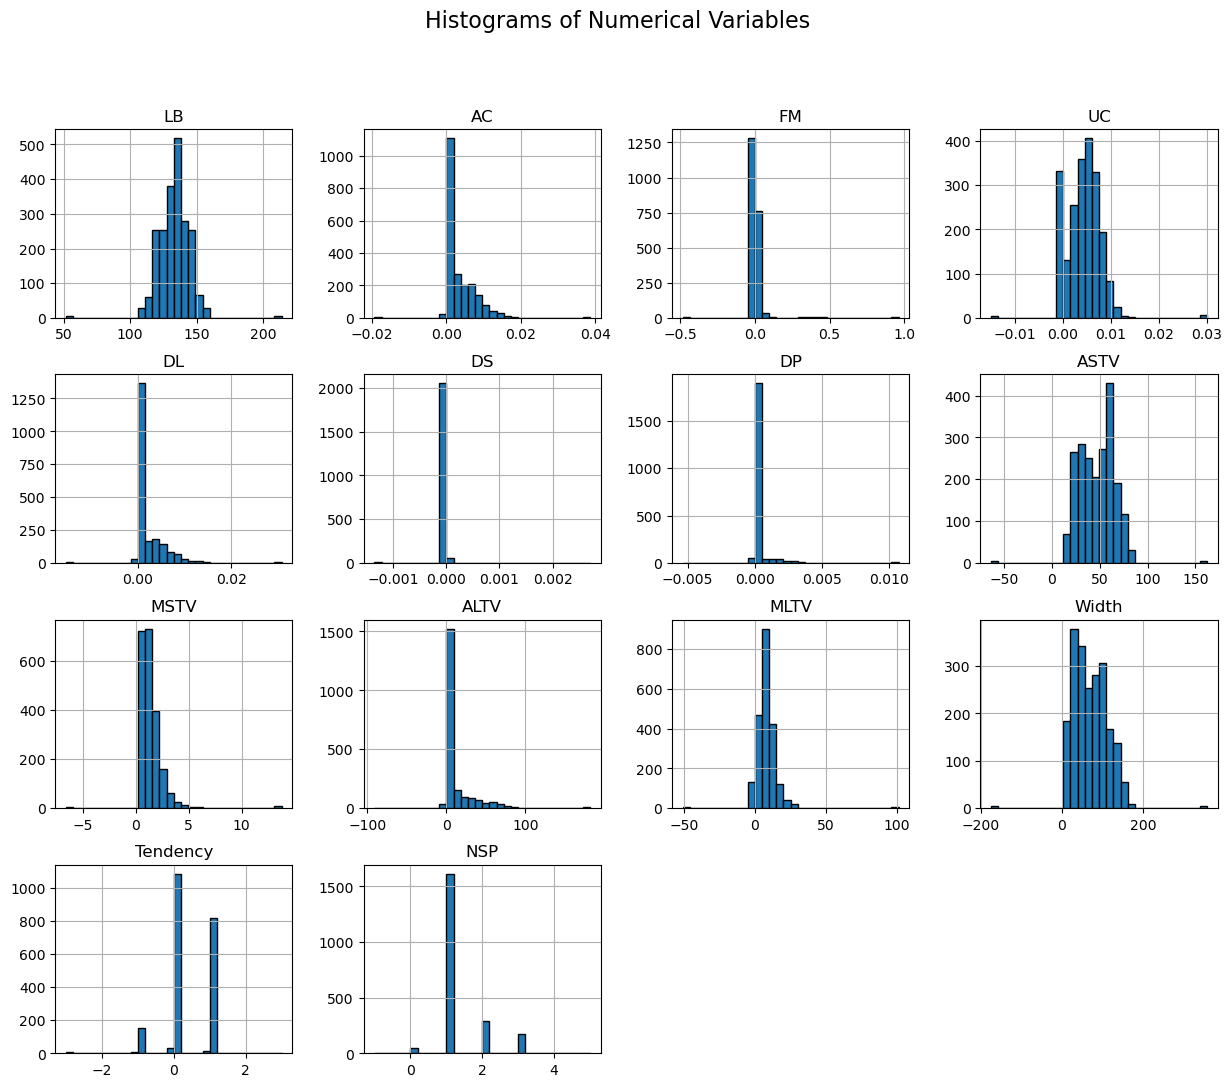

In [85]:
data1.hist(figsize = (15,12), bins =30, edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

C:\Users\vighn\AppData\Local\Temp\ipykernel_17696\3264574216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NSP", data=data1, palette="vlag")


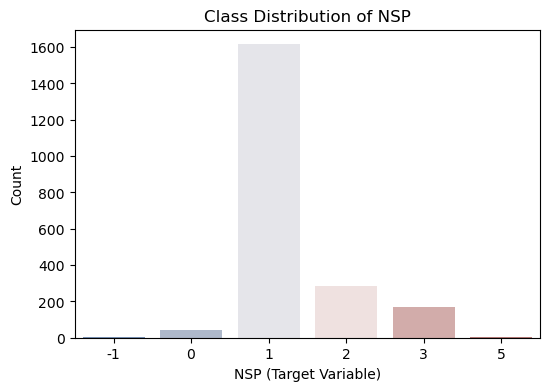

In [101]:
plt.figure(figsize=(6, 4))
sns.countplot(x="NSP", data=data1, palette="vlag")
plt.title("Class Distribution of NSP")
plt.xlabel("NSP (Target Variable)")
plt.ylabel("Count")
plt.show()


In [98]:
corr = data1.corr()

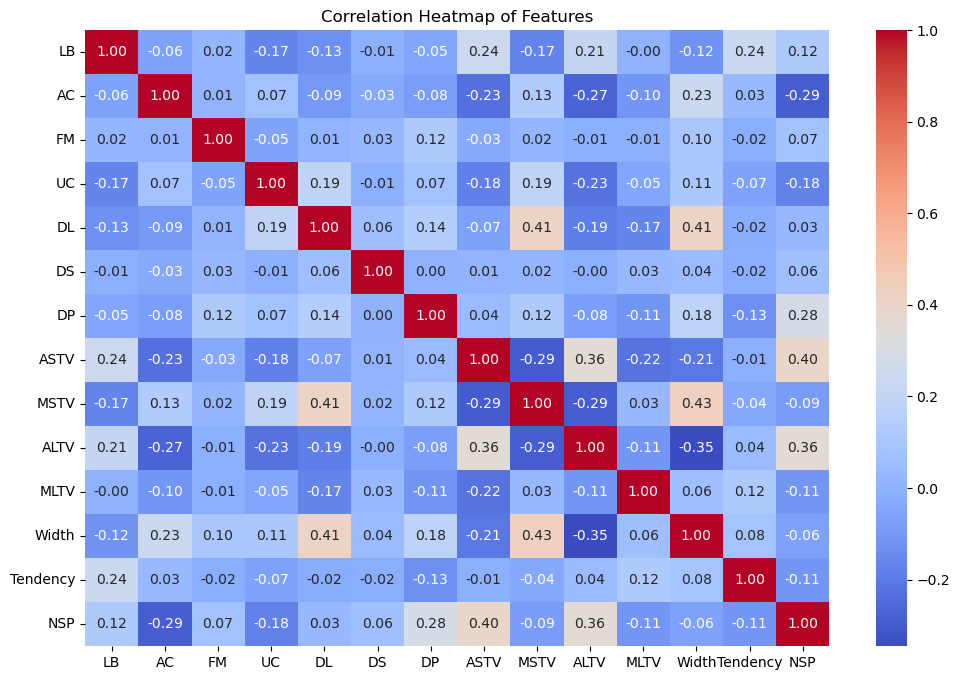

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(data1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

C:\Users\vighn\AppData\Local\Temp\ipykernel_17696\2696848128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y='LB', data=data1, palette='muted')


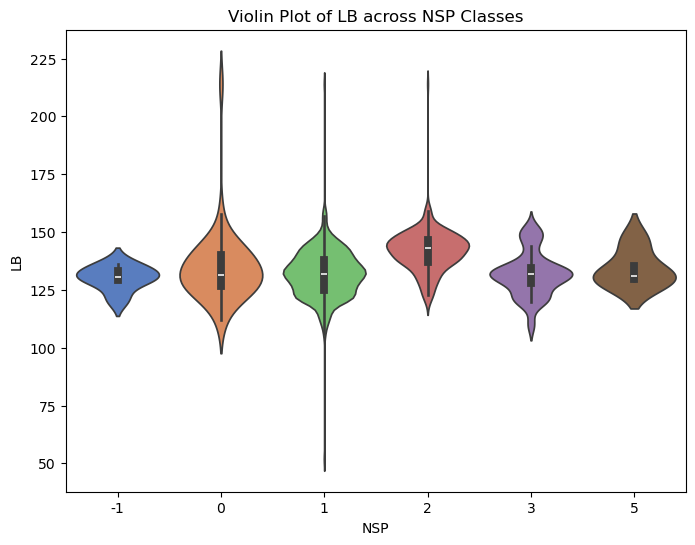

In [96]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='NSP', y='LB', data=data1, palette='muted')
plt.title('Violin Plot of LB across NSP Classes')
plt.show()

In [100]:
target_corr = corr['NSP'].sort_values(ascending=False)
print('\nCorrelation of features with NSP (target):\n')
print(target_corr)


Correlation of features with NSP (target):

NSP         1.000000
ASTV        0.396882
ALTV        0.356728
DP          0.280158
LB          0.119699
FM          0.072469
DS          0.063784
DL          0.031545
Width      -0.062771
MSTV       -0.086036
Tendency   -0.107104
MLTV       -0.108753
UC         -0.175929
AC         -0.290878
Name: NSP, dtype: float64


ASTV (Abnormal short-term variability) and ALTV (Abnormal long-term variability) Often strongly correlated with NSP, since abnormal variability indicates distress.
MSTV (Mean short-term variability) Lower values often align with abnormal NSP.
Width  Very high variability suggests abnormal fetal state.
LB (Baseline fetal heart rate) Usually moderate correlation; extremes can indicate problems.

#### 5.	Conclusion:
###### ●	Summarize the key insights and patterns discovered through your exploratory analysis.
###### ●	Discuss how these findings could impact decision-making or further analyses.


The exploratory analysis revealed that the baseline heart rate (LB) is normally distributed around 133 bpm with low variability, while features like AC, FM, UC, DL, DS, and DP show almost no variation and contribute little predictive value. Variability measures such as ASTV, MSTV, and ALTV are highly informative, with high ASTV and ALTV and low MSTV strongly linked to abnormal fetal states. The feature “Width” also showed extreme variability, making it a strong predictor. The target variable NSP is dominated by the normal class, indicating class imbalance that must be addressed before modeling. Overall, ASTV, ALTV, MSTV, and Width stand out as the most important predictors of fetal health, while low-variance features may be dropped. These insights guide both medical decision-making, by identifying early markers of fetal distress, and analytical strategies, by focusing on feature selection, imbalance handling, and predictive modeling.